In [76]:
import numpy as np
import matplotlib.image as Image
import matplotlib.pyplot as plt

In [2]:
path = './pictures/cloud.jpg'

In [3]:
img = Image.imread(path)

In [14]:
img.shape

(525, 700, 3)

In [12]:
canvas = np.zeros_like(img)

In [ ]:
max_population = 200

# Parameters

## X-Pos, Y-Pos, R, G, B, Radius, Opakeness

In [73]:
class Mask:
    def __init__(self,canvas):
        '''Accepts a canvas or Image as input,
        Returns a Circle-Mask-Object with functions.'''
        if not type(canvas) == type(np.array([0])): raise TypeError('Canvas must be of type np.array.')
        if not len(canvas.shape) == 3 and canvas.shape[2] == 3: raise TypeError('Canvas must have 3 Color-Chanels. Canvas.shape = (x, y, 3)')
        self.canvas = canvas
        self.y, self.x, _ = canvas.shape
        self.y, self.x = np.arange(0, self.y), np.arange(0, self.y)
        self.mask = np.zeros_like(canvas, dtype=bool)
        
    def __str__(self):
        '''String-Representation of Object when printing the Object'''
        return 'Mask Object to produce a circle-mask based on a image'

    def updateCanvas(self,canvas):
        '''Accepts a new canvas as input to replace the old one.
        No return value.'''
        self.__init__(canvas)
        
    def calculateMaskFromParameters(self, x_pos, y_pos, px_radius):
        '''Calculates the mask-Object with the given Set of parameters x_pos <INT>, y_pos <INT>, px_radius <INT>.
        Returns the mask.'''
        if not type(x_pos) == int and type(y_pos) == int and type(px_radius) == int: raise TypeError('All Inputs must be of type Integer')
        self.mask = (self.x[np.newaxis,:]-x_pos)**2 + (self.y[:,np.newaxis]-y_pos)**2 <= px_radius **2
        return self.mask
        
    def getCurrentMask(self):
        '''Returns the last calculated mask-Object'''
        return self.mask

In [74]:
a = Mask(img)

In [84]:
b = a.calculateMaskFromParameters(200,100,100)

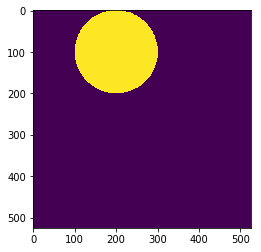

In [85]:
plt.imshow(b)

In [81]:
b.shape

(525, 525)